In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

| 컬럼명              | 설명                                                                 | 데이터 유형 / 카테고리 값                         |
|---------------------|----------------------------------------------------------------------|----------------------------------------------------|
| Age                 | 직원의 나이                                                          | 수치형 (예: 18 ~ 60)                               |
| Attrition           | 직원의 퇴사 여부 (Yes: 퇴사함, No: 재직 중)                          | Yes, No                                            |
| BusinessTravel      | 출장 빈도                                                             | Travel_Rarely, Travel_Frequently, Non-Travel       |
| DailyRate           | 하루 급여 (사내 급여 시스템에 기반한 값)                             | 수치형                                              |
| Department          | 소속 부서                                                             | Sales, Research & Development, Human Resources     |
| DistanceFromHome    | 집에서 직장까지 거리                                                  | 수치형 (단위: 마일 또는 km)                        |
| Education           | 교육 수준 (1: Below College ~ 5: Doctor)                             | 1, 2, 3, 4, 5                                      |
| EducationField      | 전공 분야                                                             | Life Sciences, Medical, Marketing, Technical Degree, Human Resources, Other |
| EmployeeCount       | 직원 수 (항상 1로 고정)                                               | 1                                                  |
| EmployeeNumber      | 직원 고유 번호                                                        | 고유 식별자 (수치형)                               |
| EnvironmentSatisfaction | 근무 환경 만족도 (1: Low ~ 4: Very High)                       | 1, 2, 3, 4                                          |
| Gender              | 성별                                                                  | Male, Female                                       |
| HourlyRate          | 시급                                                                  | 수치형                                              |
| JobInvolvement      | 직무 몰입도 (1: Low ~ 4: Very High)                                   | 1, 2, 3, 4                                          |
| JobLevel            | 직급 단계 (1: 낮음 ~ 5: 높음)                                         | 1, 2, 3, 4, 5                                      |
| JobRole             | 직무 역할                                                             | Sales Executive, Research Scientist, Laboratory Technician, etc. |
| JobSatisfaction     | 직무 만족도 (1: Low ~ 4: Very High)                                   | 1, 2, 3, 4                                          |
| MaritalStatus       | 혼인 여부                                                             | Single, Married, Divorced                         |
| MonthlyIncome       | 월급                                                                  | 수치형                                              |
| MonthlyRate         | 월급여 시스템 상의 값                                                 | 수치형                                              |
| NumCompaniesWorked  | 이전에 근무한 회사 수                                                 | 수치형                                              |
| Over18              | 18세 이상 여부 (모든 값이 Y로 동일)                                  | Y                                                  |
| OverTime            | 초과근무 여부                                                         | Yes, No                                            |
| PercentSalaryHike   | 연봉 인상률 (%)                                                       | 수치형                                              |
| PerformanceRating   | 성과 등급 (1: Low ~ 4: Outstanding)                                   | 1, 2, 3, 4                                          |
| RelationshipSatisfaction | 인간관계 만족도 (1: Low ~ 4: Very High)                   | 1, 2, 3, 4                                          |
| StandardHours       | 표준 근무 시간 (모든 값이 80으로 동일)                              | 80                                                 |
| StockOptionLevel    | 스톡옵션 수준 (0: 없음 ~ 3: 높음)                                    | 0, 1, 2, 3                                         |
| TotalWorkingYears   | 총 근무 경력(년)                                                      | 수치형                                              |
| TrainingTimesLastYear | 작년 사내 교육 횟수                                               | 수치형                                              |
| WorkLifeBalance     | 일과 삶의 균형 (1: Bad ~ 4: Best)                                     | 1, 2, 3, 4                                          |
| YearsAtCompany      | 현재 회사에서 근무한 년 수                                            | 수치형                                              |
| YearsInCurrentRole  | 현재 직무를 맡은 기간(년)                                             | 수치형                                              |
| YearsSinceLastPromotion | 마지막 승진 이후 경과 기간(년)                                 | 수치형                                              |
| YearsWithCurrManager | 현 매니저와 함께한 기간(년)                                         | 수치형                                              |


In [4]:
# 01. 데이터 수집 및 로딩
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
# 02. 데이터 구조 및 변수 이해
# - 데이터 목적 파악, Feature/Target 구분

print(df.shape, end='\n\n') # 1470, 35
print(df.dtypes, end='\n\n') # 변수 타입 확인 (수치형/범주형 등)
df.info() # - 크기, 컬럼명, 샘플확인

(1470, 35)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWor

In [24]:
# 03. 데이터 요약 및 기술통계
display(df.describe()) # 수치형

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
# 범주형 데이터 value_counts()
display(df.describe(include='object')) # 범주형
print(df.value_counts('Attrition'), end='\n\n')         # 퇴사여부
print(df.value_counts('BusinessTravel'), end='\n\n')    # 출장빈도
print(df.value_counts('EducationField'), end='\n\n')    # 전공분야
print(df.value_counts('Gender'), end='\n\n')            # 성별
print(df.value_counts('JobRole'), end='\n\n')           # 직무역할
print(df.value_counts('MaritalStatus'), end='\n\n')     # 혼인여부
print(df.value_counts('Over18'), end='\n\n')            # 18세이상 여부
print(df.value_counts('OverTime'), end='\n\n')          # 초과근무 여부

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18
Y    1470
Name: count, dtype: int64

OverTime
No     1054
Yes     416
Name: count, dtype: int64



In [29]:
# 04. 결측치, 이상치 탐지
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

In [38]:
corr_mat = df.corr(numeric_only=True)
display(corr_mat)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


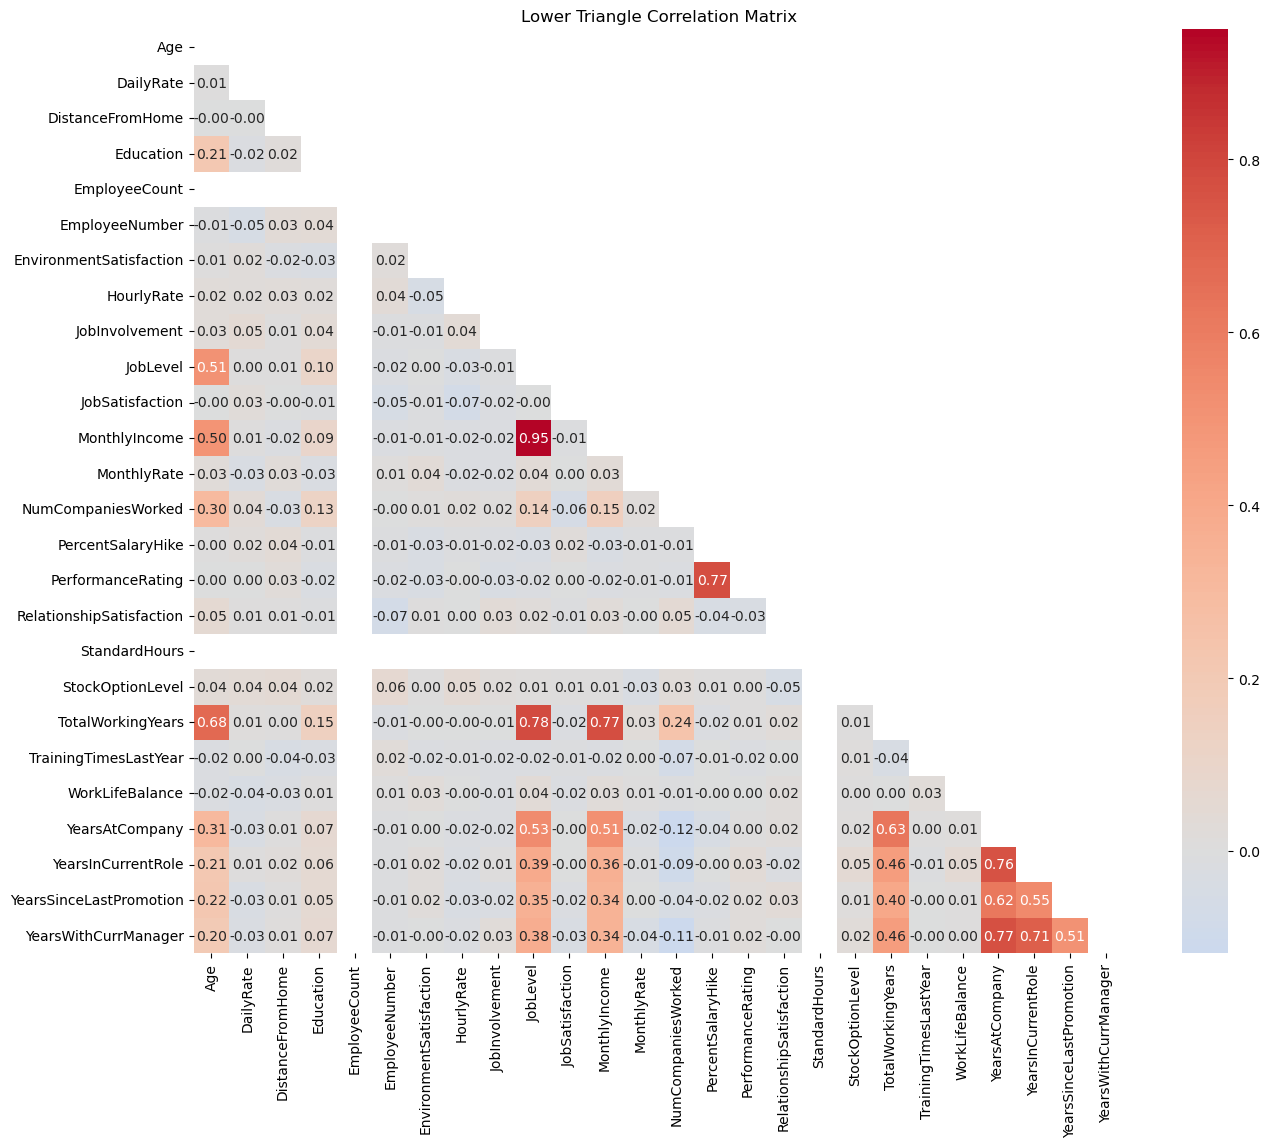

In [41]:
# 상관행렬 계산
corr_mat = df.corr(numeric_only=True)

# 마스킹 (상삼각형 가리기)
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Lower Triangle Correlation Matrix")
plt.show()


# |상관계수| > 0.7
# JobLevel(직급) - MonthlyIncome(월급): 0.95
# JobLevel(직급) - TotalWorkingYears(총 근무 연수): 0.78
# MonthlyIncome(월급) - TotalWorkingYears(총 근무 연수): 0.77
# PercentSalaryHike(급여 인상률) - PerformanceRating(성과 평가): 0.77
# YearsAtCompany(현 회사 근속 연수) - YearsInCurrentRole(현 직무 근속 연수): 0.76

# Age(나이) - JobLevel(직급): 0.51
# Age(나이) - TotalWorkingYears(총 근무 연수): 0.68
# JobLevel(직급) - MonthlyIncome(월급): 0.95
# JobLevel(직급) - TotalWorkingYears(총 근무 연수): 0.78
# JobLevel(직급) - YearsAtCompany(현 회사 근속 연수): 0.53


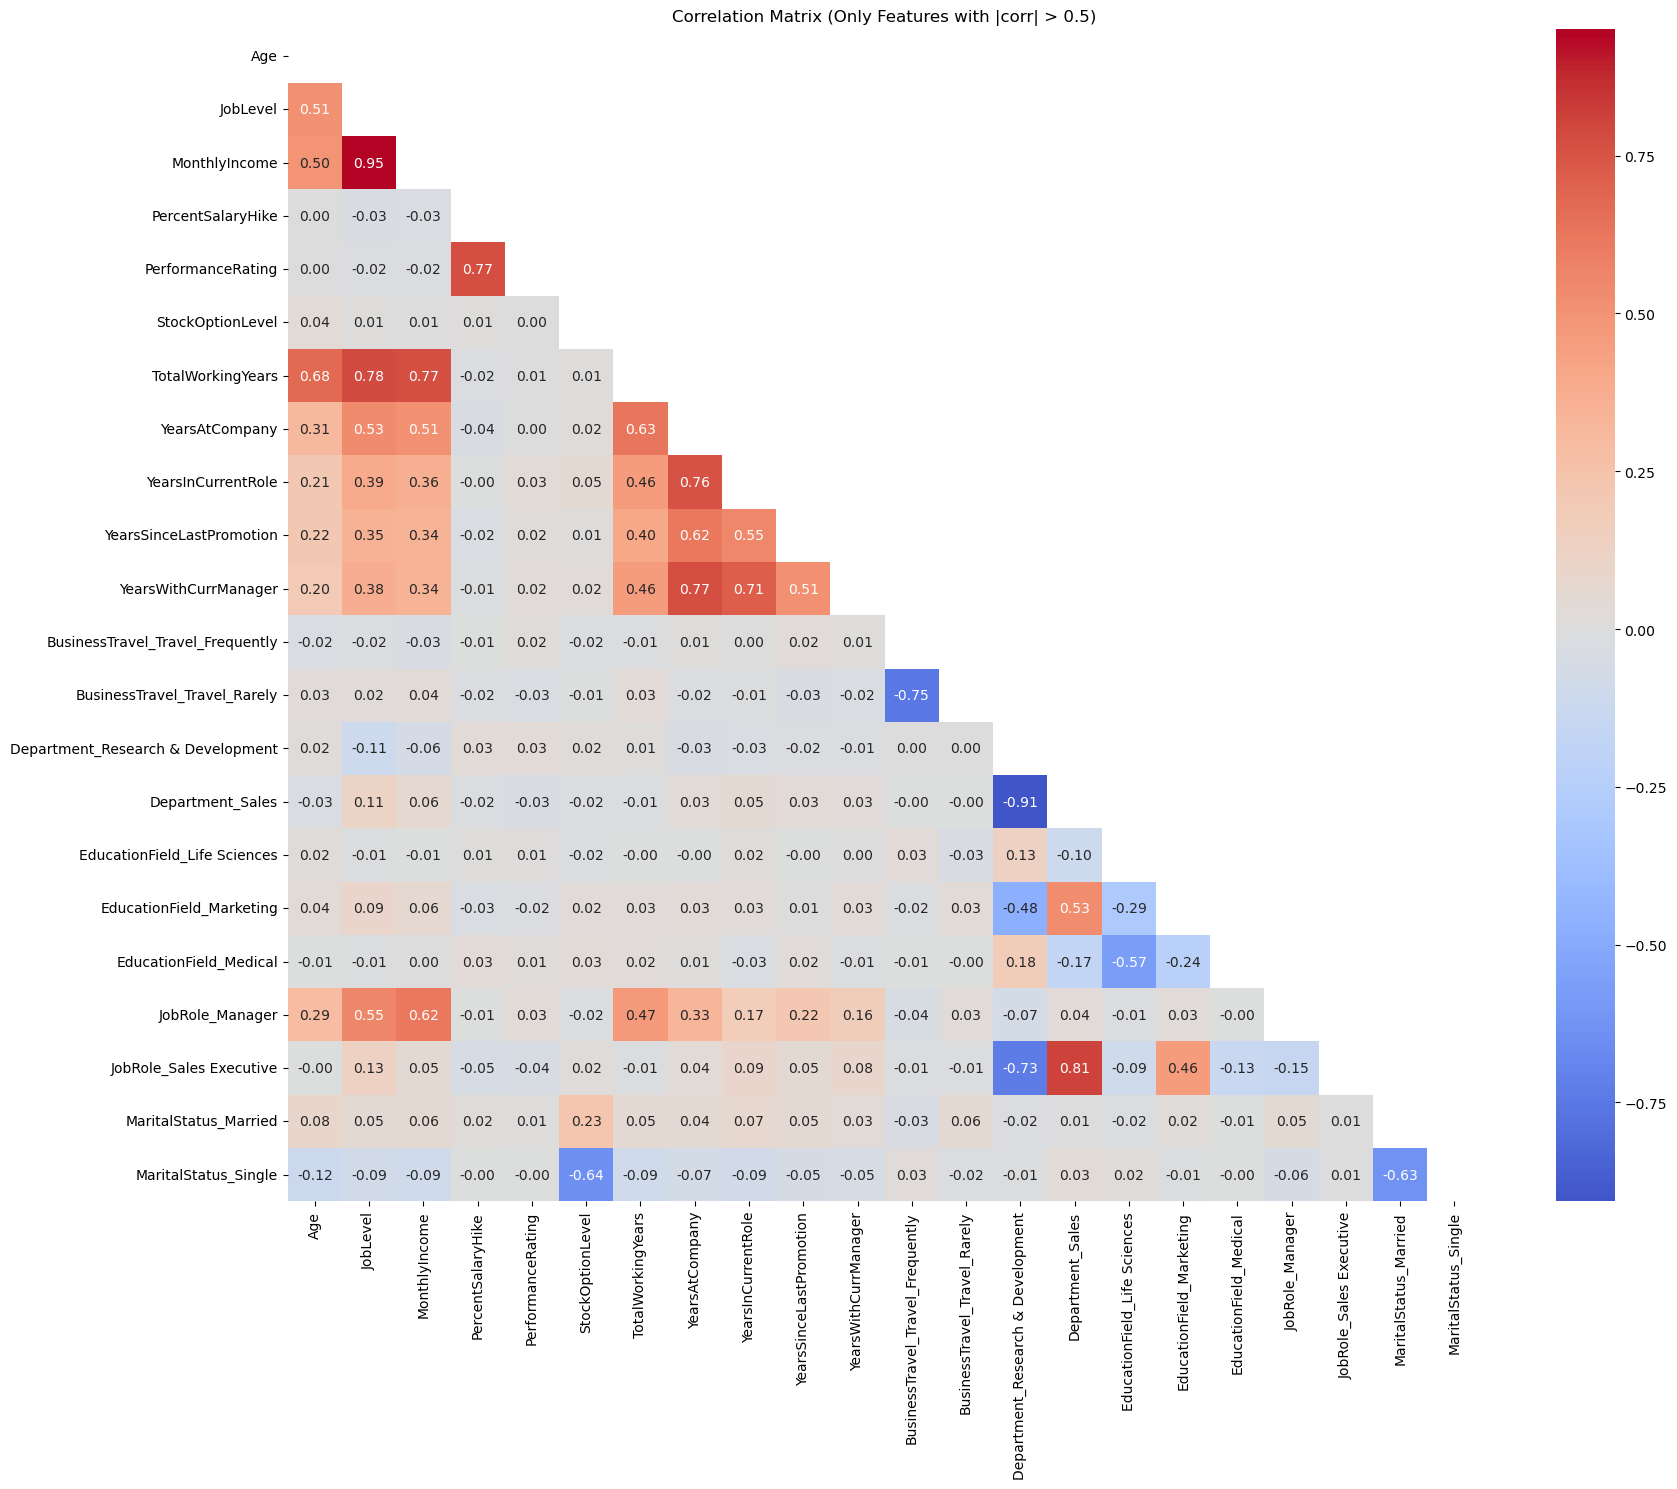

In [45]:
# 범주형 변수 원핫 인코딩
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

# 상관계수 행렬 계산
corr_matrix = df_encoded.corr()

# 자기 자신과의 상관계수는 제외 (대각선 0으로 설정)
corr_matrix_no_self = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_self.values, 0)

# 모든 다른 변수와의 상관계수 중 절댓값 최대값이 0.5 이하인 컬럼 찾기
low_corr_cols = corr_matrix_no_self.columns[(corr_matrix_no_self.abs().max(axis=0) <= 0.5)]

# 해당 컬럼 제거
df_filtered = df_encoded.drop(columns=low_corr_cols)

# 필터링된 상관 행렬 계산
filtered_corr = df_filtered.corr()

# 상삼각형 마스크 생성
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# 히트맵 시각화
plt.figure(figsize=(18, 15))
sns.heatmap(filtered_corr, mask=mask, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Matrix (Only Features with |corr| > 0.5)")
plt.tight_layout()
plt.show()

# BusinessTravel(출장 빈도) → BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely
#   - 'Non-Travel'은 drop_first=True로 인해 제거됨 (기준 기준값)

# Department(부서) → Department_Research & Development, Department_Sales
#   - 'Human Resources'는 제거됨 (drop_first)

# EducationField(전공 분야) → EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree
#   - 'Human Resources' 전공은 제거됨

# Gender(성별) → Gender_Male
#   - Female은 기준값으로 제거됨

# JobRole(직무) → JobRole_Human Resources, JobRole_Laboratory Technician, ..., JobRole_Sales Representative
#   - 가장 앞순서 직무 하나는 제거됨 (기준값)

# MaritalStatus(결혼 상태) → MaritalStatus_Married, MaritalStatus_Single
#   - 'Divorced'는 기준값으로 제거됨

# OverTime(초과 근무 여부) → OverTime_Yes
#   - 'No'는 기준값으로 제거됨

# Attrition(이직 여부) → Attrition_Yes
#   - 'No'는 기준값으로 제거됨

# Over18(성인 여부), EmployeeCount, StandardHours 등 **단일 값만 가지는 특성**은 제거되었거나 분석에서 제외될 수 있음

